In [1]:
import rodin

Rodin Class requires two data files: features table and class labels file. In features file first two columns must represent mass to charge and retention times values. All other columns should have intensities of samples.
In class labels file first column should have indicate samples ids that corresponds to name of columns in features table. Other columns in class labels represents classes of samples such as treatment group,age and etc. Name of columns doesnt matter.

In [3]:
obj=rodin.create_object_csv("./data/features.csv","./data/class_labels.csv",
                            feat_sep=',',class_sep=',')

After object was created it has three attributes, X-intensities data,features-metabolites features data, samples-classes data.

In [4]:
obj.X.head()

,N10,H3,N23,N21,H9,N24,H11,N12,N27,N11,...,L15,L6,H28,H17,H29,H15,H16,H21,H27,H22
0,122123.6,81450.5,105703.8,68083.6,76613.9,179553.0,350092.9,1098485.0,1027356.3,762143.8,...,449254.7,239062.7,97864.3,130032.1,198805.6,252323.8,252542.7,284125.3,211520.1,230847.2
1,44129.9,43017.0,13382.3,17439.9,84656.6,53518.5,52279.5,61860.5,74066.6,98743.3,...,55678.4,80340.7,33913.1,54511.8,24393.2,66214.7,76714.8,85623.6,41353.1,67703.1
2,44129.9,43017.0,13382.3,17439.9,84656.6,53518.5,52279.5,61860.5,74066.6,98743.3,...,1267474.3,1131403.6,214929.2,489213.7,437726.8,447022.2,1107044.9,777807.1,816472.9,548193.4
3,280700.2,863843.8,384781.6,225832.9,965387.7,937951.7,1164815.1,1121331.1,1070858.4,924555.2,...,55678.4,80340.7,33913.1,54511.8,24393.2,66214.7,76714.8,85623.6,41353.1,67703.1
4,280700.2,863843.8,384781.6,225832.9,965387.7,937951.7,1164815.1,1121331.1,1070858.4,924555.2,...,1267474.3,1131403.6,214929.2,489213.7,437726.8,447022.2,1107044.9,777807.1,816472.9,548193.4


In [5]:
obj.samples

,Sample ID,Dose,Sex
0,N10,Control,Female
1,H3,High,Female
2,N23,Control,Female
3,N21,Control,Female
4,H9,High,Female
...,...,...,...
66,H15,High,Male
67,H16,High,Male
68,H21,High,Male
69,H27,High,Male


In [6]:
obj.features.head(3)

,mz,time
0,85.0284,38.3
1,85.0285,213.1
2,85.0285,213.1


Function transform provides convenient way to pre process data it does imputation, filtering features with more than threshold missing values, data nprmalization(quantile, or total intensity(divides each values in column by the sum of values in this column and log2 transformation)

In [7]:
obj.transform(thresh=0.5,norm='q')

Number of features filtered: 1972


< Rodin object > 
dim: 24233 X 71

After X data was tranformed statistical tests could be performed in this basic guide we will use ttest. As an argument column from samples attribute is provided. After running the function features attribute will be updated to store data about statistical tests. p_adj column shows p_values after Benjamini-Hochberg method is applied.

In [9]:
obj.oneway_anova('Dose')

,mz,time,p_value(owa) Dose,p_adj(owa) Dose
0,85.0284,38.3,4.113913e-01,5.525192e-01
1,85.0285,213.1,3.088595e-03,2.654110e-02
2,85.0285,213.1,9.725732e-01,9.795663e-01
3,85.0285,69.4,9.038740e-01,9.299141e-01
4,85.0285,69.4,8.046424e-03,4.931699e-02
...,...,...,...,...
24228,845.6749,294.9,2.844420e-01,4.436145e-01
24229,845.7611,293.1,2.921493e-09,3.994310e-07
24230,845.8602,287.9,8.848956e-07,5.811294e-05
24231,845.8797,290.9,1.272754e-03,1.485677e-02


fold_change function also is recommended to use futher for pathway analysis. it calculates log fold change difference in the defined class. As reference the fisrt appeared class in the column is used.

In [11]:
obj.fold_change('Dose')

,mz,time,p_value(owa) Dose,p_adj(owa) Dose,lfc (Control vs High),lfc (Control vs Low),lfc (Control vs others)
0,85.0284,38.3,4.113913e-01,5.525192e-01,0.015465,1.333126,0.674296
1,85.0285,213.1,3.088595e-03,2.654110e-02,-0.256284,0.576687,0.160201
2,85.0285,213.1,9.725732e-01,9.795663e-01,-0.192466,-0.118744,-0.155605
3,85.0285,69.4,9.038740e-01,9.299141e-01,0.203966,0.391888,0.297927
4,85.0285,69.4,8.046424e-03,4.931699e-02,0.267784,-0.303543,-0.017879
...,...,...,...,...,...,...,...
24228,845.6749,294.9,2.844420e-01,4.436145e-01,-3.605607,-4.144843,-3.875225
24229,845.7611,293.1,2.921493e-09,3.994310e-07,-9.249374,-19.109635,-14.179505
24230,845.8602,287.9,8.848956e-07,5.811294e-05,-5.515928,-16.763752,-11.139840
24231,845.8797,290.9,1.272754e-03,1.485677e-02,-9.025662,-4.351919,-6.688791


rodin class also provides convenient way to slice data. During the slicing a;; main attributes will updated, as an example when you slice features table by p_value. X attribute will be updated as well that will allow to calculate principal components on updated object and plot the results selected features. (Umap and t-sne alse are available)

In [45]:
obj_2 = obj[obj.features[obj.features['p_adj(owa) Dose']<0.01]]

In [46]:
obj_2.run_pca()
obj_2.run_umap()

After running dimenional reduction methods n-components will be stored in the class as well in dr attribute

In [47]:
obj_2

< Rodin object > 
dim: 1685 X 71
dr: pca, umap

<Axes: xlabel='umap_1', ylabel='umap_2'>

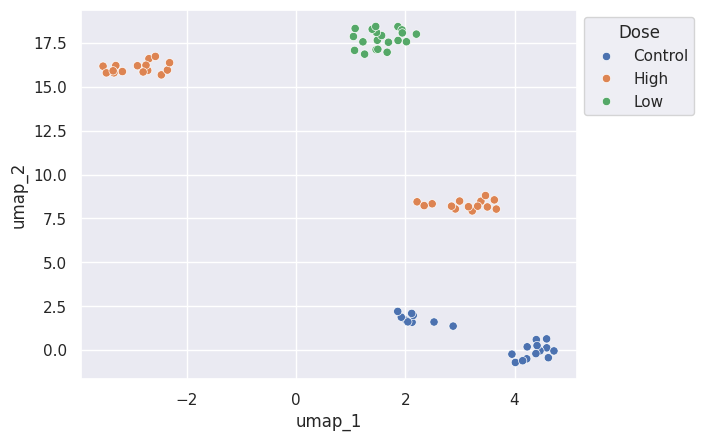

In [48]:
obj_2.plot(dr_name='umap',hue='Dose')

<Axes: xlabel='pca_1', ylabel='pca_2'>

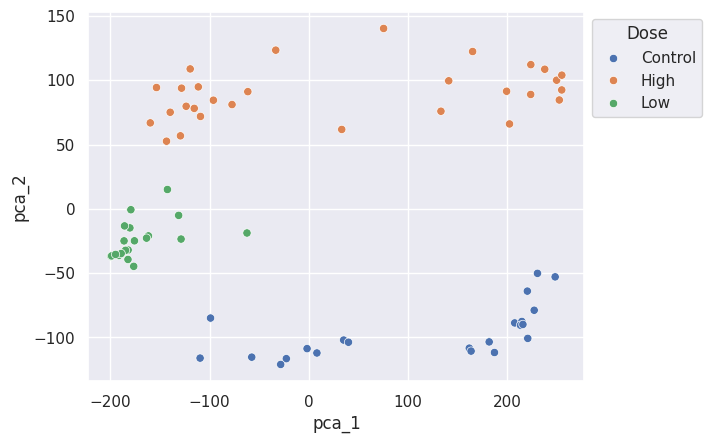

In [49]:
obj_2.plot(dr_name='pca',hue='Dose')

For pathway analysis alghoritm mummichog was integrated. As input user is required to indicate column from features table with p values and statistics. In this example we will use p_adj(owa) Dose and lfc (Control vs others). Output of the function is the table with pathways and compunds information both tables will be stored in uns attribute. For more detailed information about parameteres of 'analyze_pathways' function look at pathways guide.

In [50]:
obj.analyze_pathways('p_adj(owa) Dose','lfc (Control vs others)')

Started @ Wed Dec  6 11:29:32 2023

Read 24233 features as reference list.
Automatically choosing (p < 0.000100) as significant cutoff.
Using 412 features (p < 0.000100) as significant list.

Pathway Analysis...
Query number of significant compounds = 39 compounds
Resampling, 100 permutations to estimate background ...


Got 1656 cpd2mzFeatures
Got 3511 ListOfEmpiricalCompounds
Got 2241 merged ListOfEmpiricalCompounds
Got 1148 final ListOfEmpiricalCompounds
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100


Pathway background is estimated on 11900 random pathway values


,pathway,overlap_size,pathway_size,p-value,overlap_EmpiricalCompounds (id)
0,Beta-Alanine metabolism,3,15,0.0053776993529955465,"E519,E1253,E635"
1,Glutathione Metabolism,3,16,0.006133938324510545,"E519,E286,E705"
2,Purine metabolism,7,86,0.008486681791446097,"E526,E382,E785,E1892,E546,E551,E519"
3,Histidine metabolism,4,36,0.011511637677506091,"E519,E644,E635,E1253"
4,Urea cycle/amino group metabolism,5,66,0.025544071926728848,"E161,E1163,E546,E551,E519"
...,...,...,...,...,...
114,Starch and Sucrose Metabolism,0,17,0.34366859927737164,
115,Trihydroxycoprostanoyl-CoA beta-oxidation,0,1,0.34366859927737164,
116,Omega-6 fatty acid metabolism,0,4,0.34366859927737164,
117,Phytanic acid peroxisomal oxidation,0,7,0.34366859927737164,


In [54]:
obj

< Rodin object > 
dim: 24233 X 71
dr: pca, umap
uns: pathways, compounds

In [53]:
obj.uns['compounds']

,input_row,EID,str_row_ion,compounds,compound_names,m/z,retention_time,p_value,statistic
0,52,E11,M+H[1+],C02218,2-Aminoacrylate; Dehydroalanine,88.0394,74.1,0.879160,0.055963
1,52,E15,M+2H[2+],C00439,N-Formimidoyl-L-glutamate,88.0394,74.1,0.879160,0.055963
2,53,E17,M+2H[2+],C00437,N2-Acetyl-L-ornithine,88.0579,68.0,0.576388,2.318395
3,54,E22,M+H[1+],C00555,4-Aminobutanal; 4-Aminobutyraldehyde; Butyrald...,88.0758,23.8,0.074698,4.696622
4,55,E22,M+H[1+],C00555,4-Aminobutanal; 4-Aminobutyraldehyde; Butyrald...,88.0758,23.8,0.086919,6.959056
...,...,...,...,...,...,...,...,...,...
1801,24103,E2238,M+H[1+],C02737,Phosphatidylserine,836.5505,31.0,0.036482,-6.951723
1802,24117,E2238,M(C13)+H[1+],C02737,Phosphatidylserine,837.5494,29.7,0.787469,-0.808606
1803,24131,E2240,M+H[1+],C00136;C00630,Butanoyl-CoA; Butyryl-CoA$2-Methylpropanoyl-Co...,838.1586,290.7,0.045445,-5.848682
1804,24156,E2241,M+H[1+],C05668,3-Hydroxypropionyl-CoA; 3-Hydroxypropionyl coe...,840.1433,56.8,0.225482,-1.505397


After running the pathway analysis plotting barplot or violin plots are available based on EIDs.(by default not significant metabolites will be not shown)

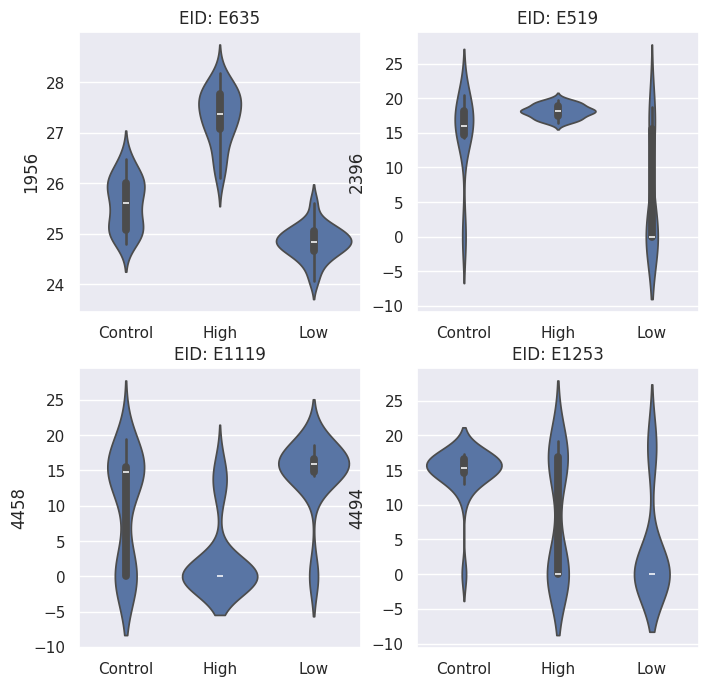

In [65]:
obj.violinplot(eids=['E519','E1253','E635'],grid_dim=(2,2),hue='Dose')